<a href="https://colab.research.google.com/github/itsmekrish887/testrepo/blob/main/Football_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Premier League - An Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install jovian opendatasets --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
dataset_url = 'https://www.kaggle.com/irkaal/english-premier-league-results'
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: krishnendudubey
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/irkaal/english-premier-league-results


100%|██████████| 595k/595k [00:00<00:00, 59.1MB/s]

In [4]:
data_dir = './english-premier-league-results'


In [5]:
EPL_data = pd.read_csv('./english-premier-league-results/results.csv', encoding = 'unicode_escape')
EPL_data

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


##The dataset contains results of all the matches 1993–94 season to 2020–21 season. Labels to note :
FTHG : Full time home goals.
FTAG : Full time away goals.
FTR : Full time Result.
HTHG : Half time home goals.
HTAG : Half time home goals.
HTR : Half time home goals.
HS : Home team shots.
AS : Away team shots.
HST : Home team shots on target.
AST : Away team shots on target.
HC : Home team corners.
AC : Away team corners.
HF : Home team Fouls.
AF : Away team Fouls.
HY : Home team yellow cards.
AY : Away team yellow cards.
HR : Home team red cards.
AR : Away team red cards.
# We can check the shape of our dataset using the .shape method. It returns a tuple in the form (Number of Rows, Number of columns)

In [11]:
EPL_data.shape

(11113, 23)

In [12]:
EPL_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

In [13]:
EPL_data.head(2)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, there are a few columns with null values.Let's see number of null cells for every column using **isna** function and delete the rows which contain the null values using .**drop** method. We have to provide axis argument where 0 = rows and 1 = columns.

In [14]:
pd.isna(EPL_data).sum()

Season         0
DateTime       0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
HTHG         924
HTAG         924
HTR          924
Referee     2824
HS          2824
AS          2824
HST         2824
AST         2824
HC          2824
AC          2824
HF          2824
AF          2824
HY          2824
AY          2824
HR          2824
AR          2824
dtype: int64

 Getting rid of all the rows which contain null values. Looks like those stats were not available during a few seasons.

In [15]:
EPL_data = EPL_data.drop(range(0,(2824)), axis =0)
EPL_data

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
2824,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
2825,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2826,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2827,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2828,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


In [16]:
EPL_data.shape

(8289, 23)

In [17]:
pd.isna(EPL_data).sum()

Season      0
DateTime    0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

The exact time is not really that important for us. We can just extract the month and day using .month and .day attributes of DateTime ojects. We will then drop the DateTime column as it is not needed.


In [18]:
##Extracting Month and Day from DateTime column
EPL_data['Month'] = pd.DatetimeIndex(EPL_data['DateTime']).month
EPL_data['Day'] = pd.DatetimeIndex(EPL_data['DateTime']).day
##Dropping the DateTime column
EPL_data = EPL_data.drop('DateTime', axis = 1)
EPL_data.head()

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HC,AC,HF,AF,HY,AY,HR,AR,Month,Day
0,1993-94,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,14
1,1993-94,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,14
2,1993-94,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,14
3,1993-94,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,14
4,1993-94,Man City,Leeds,1,1,D,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,14


##Exploratory Analysis and Visualization


In [19]:
EPL_data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Month,Day
count,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000
mean,1.519242,1.155507,0.681506,0.506816,13.503921,10.644589,6.117264,4.768247,6.081795,4.784292,11.379057,11.873447,1.415852,1.746532,0.062854,0.089396,6.750754,16.000121
std,1.299000,1.142826,0.831712,0.723624,5.258636,4.583010,3.327521,2.792965,3.095070,2.728954,3.784956,3.957427,1.189134,1.267468,0.253416,0.297341,3.940818,9.061825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,3.000000,8.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000,8.000000,16.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000,11.000000,24.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000,12.000000,31.000000


##Insights



1.   On an average the home team scores more goals and takes more shots
2.   The away team commits more fouls.
3.   Away team gets more yellow and red cards.
4.   Most goals scored by one team in a match are 9.
5.   Most goals scored at hal time are 5.








Season-wise analysis
Let's look at the data and compare the trends based on season.
Here we will first sort the data according to the season by using .groupby() function.

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [8]:
EPL_by_season =  EPL_data.groupby(['Season']).sum()
EPL_by_season

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,
1993-94,1993-08-14T00:00:00Z1993-08-14T00:00:00Z1993-0...,ArsenalAston VillaChelseaLiverpoolMan CityNewc...,CoventryQPRBlackburnSheffield WedsLeedsTottenh...,663,532,AHAHDAAHAAAAHHHDAHHADAHDHHADHAHDAAHADHHAHHHHDH...,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994-95,1994-08-20T00:00:00Z1994-08-20T00:00:00Z1994-0...,ArsenalChelseaCoventryCrystal PalaceEvertonIps...,Man CityNorwichWimbledonLiverpoolAston VillaNo...,697,498,HHDADAHADDADHHDDHHDHHDHAHHHHAAAHAAAADHDHDAAHHD...,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-96,1995-08-19T00:00:00Z1995-08-19T00:00:00Z1995-0...,Aston VillaBlackburnChelseaLiverpoolMan CityNe...,Man UnitedQPREvertonSheffield WedsTottenhamCov...,580,408,HHDHDHAAHDHAHAHDAHAHDHHHHDHAAADHDHAHDDDDDDAAHH...,271.0,169.0,HHDDAHAHDDDAHDDDAHDHDHHHHDHADDHDHHDDDHDAHDDDDH...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-97,1996-08-17T00:00:00Z1996-08-17T00:00:00Z1996-0...,ArsenalBlackburnCoventryDerbyEvertonMiddlesbro...,West HamTottenhamNott'm ForestLeedsNewcastleLi...,559,411,HAADHDHDADHAHHHDHADDHHADADDHDHHDAADAHDAHDAHHDA...,256.0,181.0,HAAAHDDDADDADDHAHAHAHHADDDDADDDAADDDHAHHHAHHDA...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-98,1997-08-09T00:00:00Z1997-08-09T00:00:00Z1997-0...,BarnsleyBlackburnCoventryEvertonLeedsLeicester...,West HamDerbyChelseaCrystal PalaceArsenalAston...,592,427,AHHADHHADAHAAAHAHDDHADHAHDAHAHDADHHADHHAHHHHDH...,273.0,192.0,HHDADHDADDHDAADAHDHAADHDHHAHADHAADDDDDHAHHDDDH...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998-99,1998-08-15T00:00:00Z1998-08-15T00:00:00Z1998-0...,BlackburnCoventryEvertonMan UnitedMiddlesbroug...,DerbyChelseaAston VillaLeicesterLeedsCharltonW...,553,406,DHDDDDAHAHHDDHDHADHHDHDADAADAHAHDHAHHHAHAHDDHH...,243.0,172.0,DHDADDDDDDHDDHDDADHHDHDAAADDAHDDDHAHHDHHAHDHHH...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-00,1999-08-07T00:00:00Z1999-08-07T00:00:00Z1999-0...,ArsenalChelseaCoventryLeedsMiddlesbroughNewcas...,LeicesterSunderlandSouthamptonDerbyBradfordAst...,635,425,HHADAAAAHDHAHAHHHADADAHDHDHDHHHHHDAHHAAAAHAHAA...,285.0,190.0,DHDDDDDAHAHDDAHHHAAAHADDDDADDHHADHADDHDADHDHHD...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01,2000-08-19T00:00:00Z2000-08-19T00:00:00Z2000-0...,CharltonChelseaCoventryDerbyLeedsLeicesterLive...,Man CityWest HamMiddlesbroughSouthamptonEverto...,587,405,HHADHDHHHHHHDDHHHAAHDDHAAHDDDAHDHDDADHHDDAHHHA...,261.0,181.0,HHDAHDDDHHHHDADHDADADHDAAHAADAHDADHAADHHDADHHH...,Rob HarrisGraham BarberBarry KnightAndy D'Urso...,...,2342.0,1722.0,2390.0,1766.0,4932.0,5299.0,512.0,682.0,32.0,31.0
2001-02,2001-08-18T00:00:00Z2001-08-18T00:00:00Z2001-0...,CharltonDerbyLeedsLeicesterLiverpoolMiddlesbro...,EvertonBlackburnSouthamptonBoltonWest HamArsen...,557,444,AHHAHAHDDHDAHHDHHHHDAADDDHDDDDAHAHDHAAAAHHDADA...,257.0,195.0,DHDADAHDHDADHHADHHHDDADHDHDDDAAHDDDDDDAAHHDAHA...,N. S. BarryP. A. DurkinC. R. WilkesR. StylesJ....,...,2202.0,1655.0,2441.0,1757.0,4891.0,5221.0,479.0,686.0,32.0,40.0


Goals scored per season
Let's compare number of goals scored per season. We will create a new column which would be the addition of goals scored by home team and goals scored by away team.


In [9]:
EPL_by_season['Goals'] = EPL_by_season['FTHG'] + EPL_by_season['FTAG']
EPL_by_season = EPL_by_season.reset_index()

Now that we have the dataframe, let's plot the bar graph. Here we're using the barplot() function from seaborn library. As arguments we'll provide Goals series for x axis, Season series for y axis and a data argument. Seaborn has good support for pandas. By providing a dataframe in the 'data' argument, seaborn will automatically find the x and y series' from the given dataframe.


Text(0.5, 1.0, 'Number of Goals Scored Per Season')

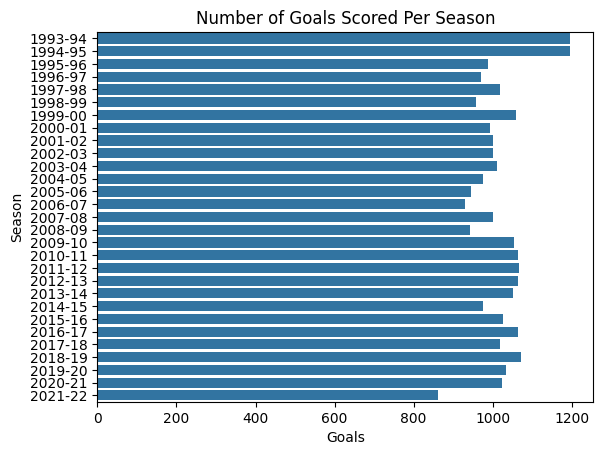

In [10]:
sns.barplot(x = 'Goals', y = 'Season', data = EPL_by_season)
plt.title('Number of Goals Scored Per Season')


Insights:

1.   Heighest number of goals scored are around 1100
2.   93-95 heighest numbers of goals scored
3.   21-22 is the lowest number of goals scored





##Home Goals vs Away Goals
We will plot a double barplot for the same. Before we do that, SNS requires us to melt our data which lets us use the comparison parameter as hue. It will get clear when you compare the data frame below with our original data frame.

In [11]:
EPL_melted = EPL_by_season[['Season', 'FTHG', 'FTAG']]
EPL_melt = EPL_melted.melt("Season",var_name="H/A",value_name="Goals")
EPL_melt

,Season,H/A,Goals
0,1993-94,FTHG,663
1,1994-95,FTHG,697
2,1995-96,FTHG,580
3,1996-97,FTHG,559
4,1997-98,FTHG,592
5,1998-99,FTHG,553
6,1999-00,FTHG,635
7,2000-01,FTHG,587
8,2001-02,FTHG,557
9,2002-03,FTHG,570


from matplotlib import pyplot as plt
EPL_melt['Goals'].plot(kind='hist', bins=20, title='Goals')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
EPL_melt.groupby('H/A').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
EPL_melt['Goals'].plot(kind='line', figsize=(8, 4), title='Goals')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(EPL_melt['H/A'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(EPL_melt, x='Goals', y='H/A', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

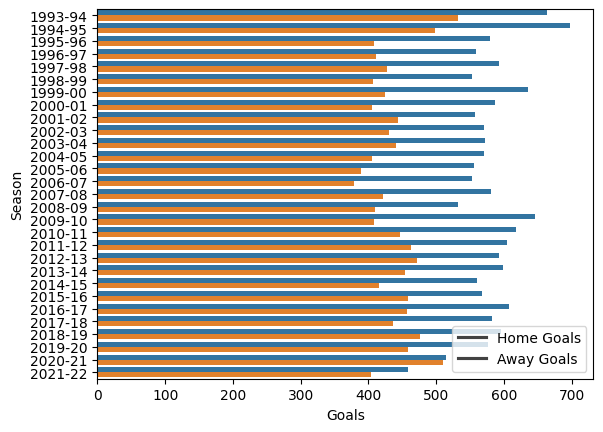

In [15]:
sns.barplot(x='Goals', y='Season', hue='H/A', data=EPL_melt)

plt.legend(['Home Goals', 'Away Goals'])

Insights:

Home goals are always more than Away goals


#### Plotting a heatmap for distribution of goals per month

Now let's prepare our data for a heatmap that shows us the goals scored per month with respect to each season. For that, we use a special funcion provided by pandas called .pivot() which converts the dataframe into a 2D matrix, with first argument (series) being rows, 2nd argument being columns and third argument being the values corresponding to series 1 and series 2. Check it out below.

In [20]:
EPL_heat = EPL_data.groupby(['Season','Month']).sum().reset_index()
EPL_heat['Goals'] = EPL_heat['FTHG'] + EPL_heat['FTAG']
Final = EPL_heat.pivot(index='Season', columns='Month', values='Goals')

Final

Month,1,2,3,4,5,6,7,8,9,10,11,12
Season,,,,,,,,,,,,
1993-94,98.0,107.0,143.0,182.0,52.0,NaN,NaN,141.0,102.0,104.0,106.0,160.0
1994-95,84.0,120.0,123.0,135.0,89.0,NaN,NaN,115.0,90.0,168.0,106.0,165.0
1995-96,89.0,97.0,124.0,120.0,29.0,NaN,NaN,92.0,110.0,80.0,95.0,152.0
1996-97,83.0,60.0,138.0,102.0,68.0,NaN,NaN,70.0,128.0,76.0,105.0,140.0
1997-98,76.0,81.0,95.0,134.0,71.0,NaN,NaN,117.0,110.0,81.0,127.0,127.0
1998-99,67.0,100.0,77.0,125.0,92.0,NaN,NaN,51.0,102.0,91.0,122.0,132.0
1999-00,77.0,95.0,112.0,163.0,68.0,NaN,NaN,147.0,86.0,126.0,71.0,115.0
2000-01,92.0,62.0,70.0,133.0,84.0,NaN,NaN,87.0,130.0,84.0,102.0,148.0
2001-02,109.0,69.0,150.0,113.0,40.0,NaN,NaN,63.0,122.0,95.0,69.0,171.0


Text(0.5, 1.0, 'Goals Distribution based on month')

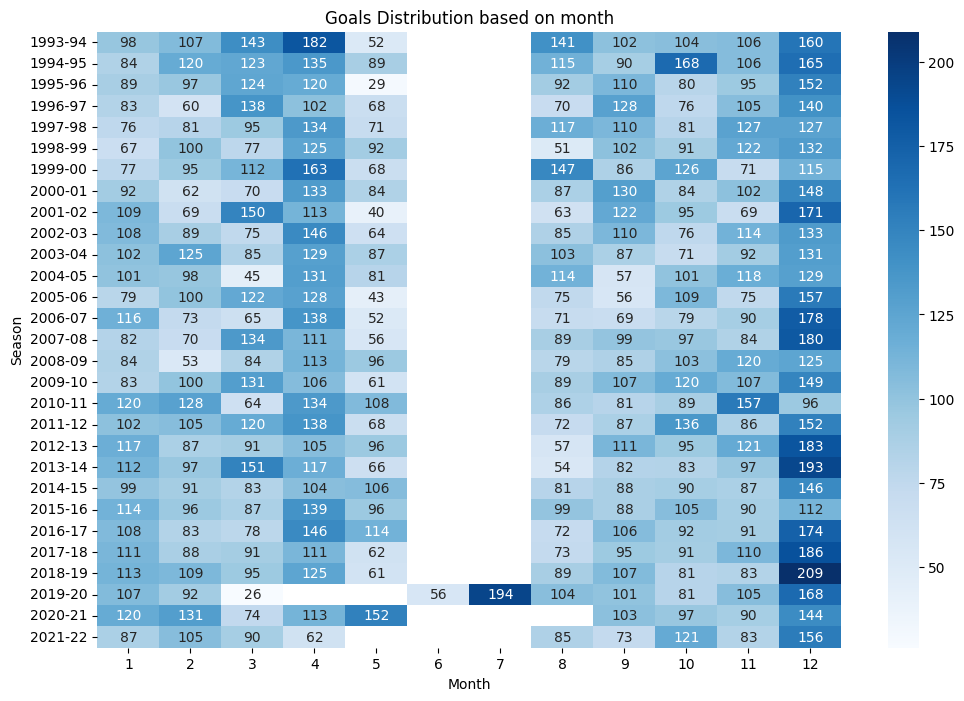

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(Final, annot = True, cmap = 'Blues',fmt='g')
plt.title('Goals Distribution based on month')

The above graphs tells us more about the data.
No games are played in the months of June and July, thus no goals are scored.
Almost every year, December has seen the most number of goals. This is because december sees the most number of matches played.
The 2019-20 season was disrupted due to the pandemic. Games were played in June and July instead of April and May under project restart.
The season ends mid-May, thus the low number of goals scored in May.
Let's quickly plot another graph of Goals scored per game. It is fairly simple.

In [25]:
##Let's quickly plot another graph of Goals scored per game. It is fairly simple.
EPL_count = EPL_data.groupby(['Season','Month']).count().reset_index()
EPL_heat['G/M'] = round(EPL_heat['Goals'] / EPL_count['FTHG'])
Final = EPL_heat.pivot(index='Season', columns='Month', values='G/M')
Final

Month,1,2,3,4,5,6,7,8,9,10,11,12
Season,,,,,,,,,,,,
1993-94,2.0,3.0,3.0,3.0,3.0,NaN,NaN,2.0,3.0,2.0,2.0,3.0
1994-95,2.0,3.0,3.0,2.0,3.0,NaN,NaN,3.0,3.0,3.0,2.0,3.0
1995-96,3.0,3.0,3.0,2.0,2.0,NaN,NaN,2.0,3.0,2.0,2.0,3.0
1996-97,2.0,2.0,3.0,2.0,3.0,NaN,NaN,2.0,3.0,3.0,3.0,3.0
1997-98,3.0,2.0,3.0,3.0,3.0,NaN,NaN,3.0,3.0,3.0,3.0,2.0
1998-99,2.0,3.0,3.0,3.0,3.0,NaN,NaN,2.0,3.0,2.0,3.0,3.0
1999-00,2.0,3.0,3.0,3.0,3.0,NaN,NaN,3.0,3.0,3.0,2.0,3.0
2000-01,2.0,2.0,2.0,3.0,3.0,NaN,NaN,3.0,3.0,3.0,3.0,3.0
2001-02,3.0,2.0,3.0,2.0,3.0,NaN,NaN,2.0,3.0,3.0,2.0,3.0


Text(0.5, 1.0, 'Goals per match based on month')

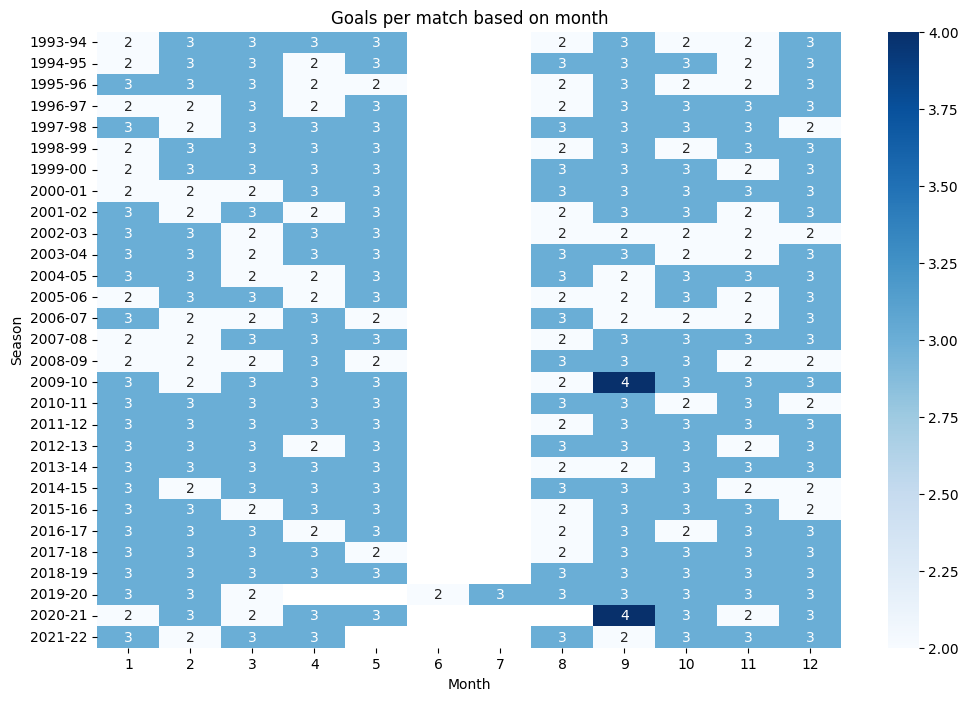

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(Final, annot = True, cmap = 'Blues',fmt='g')
plt.title('Goals per match based on month')

Now, let's explore how the Shots taken by home team compare to those taken by away team for every Season. We will use the same EPL_by_season dataframe that we created before.
We can plot multiple the lines in same graph by writing all sns.lineplot() calls in the same cell as seen below.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, '1993-94'),
  Text(1, 0, '1994-95'),
  Text(2, 0, '1995-96'),
  Text(3, 0, '1996-97'),
  Text(4, 0, '1997-98'),
  Text(5, 0, '1998-99'),
  Text(6, 0, '1999-00'),
  Text(7, 0, '2000-01'),
  Text(8, 0, '2001-02'),
  Text(9, 0, '2002-03'),
  Text(10, 0, '2003-04'),
  Text(11, 0, '2004-05'),
  Text(12, 0, '2005-06'),
  Text(13, 0, '2006-07'),
  Text(14, 0, '2007-08'),
  Text(15, 0, '2008-09'),
  Text(16, 0, '2009-10'),
  Text(17, 0, '2010-11'),
  Text(18, 0, '2011-12'),
  Text(19, 0, '2012-13'),
  Text(20, 0, '2013-14'),
  Text(21, 0, '2014-15'),
  Text(22, 0, '2015-16'),
  Text(23, 0, '2016-17'),
  Text(24, 0, '2017-18'),
  Text(25, 0, '2018-19'),
  Text(26, 0, '2019-20'),
  Text(27, 0, '2020-21'),
  Text(28, 0, '2021-22')])

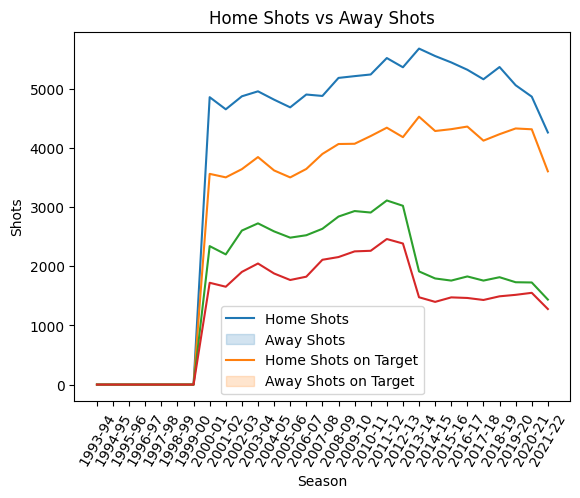

In [29]:
import warnings
warnings.filterwarnings('ignore')
sns.lineplot(x='Season', y='HS', data=EPL_by_season)
sns.lineplot(x='Season', y='AS', data=EPL_by_season)
sns.lineplot(x='Season', y='HST', data=EPL_by_season)
sns.lineplot(x='Season', y='AST', data=EPL_by_season)
plt.legend(['Home Shots','Away Shots','Home Shots on Target','Away Shots on Target' ])
plt.ylabel('Shots')
plt.title('Home Shots vs Away Shots')
plt.xticks(rotation=60)

##Team-wise comparison
Let's see how the stats compare based on teams that have played in the top division of English football.
We would need to create two groupby objects because we don't have a teams column. We have HomeTeam and AwayTeam columns. We will use these objects further in our analysis.


In [30]:
EPL_home = EPL_data.groupby(EPL_data.HomeTeam)
EPL_away = EPL_data.groupby(EPL_data.AwayTeam)

Total goals scored by each team over all seasons
We will sum the goals scored by home teams from the EPL_home object and goals scored by away teams from the EPL_away object. We will plot a simple bar graph to visualise the same.

In [31]:
EPL_team_goals = EPL_home['FTHG'].sum() + EPL_away['FTAG'].sum()
EPL_team_goals = EPL_team_goals.reset_index()
EPL_team_goals.rename( columns={0 :'Goals'}, inplace=True )
EPL_team_goals = EPL_team_goals.sort_values(['Goals'], ascending=False)

Text(0, 0.5, 'Team')

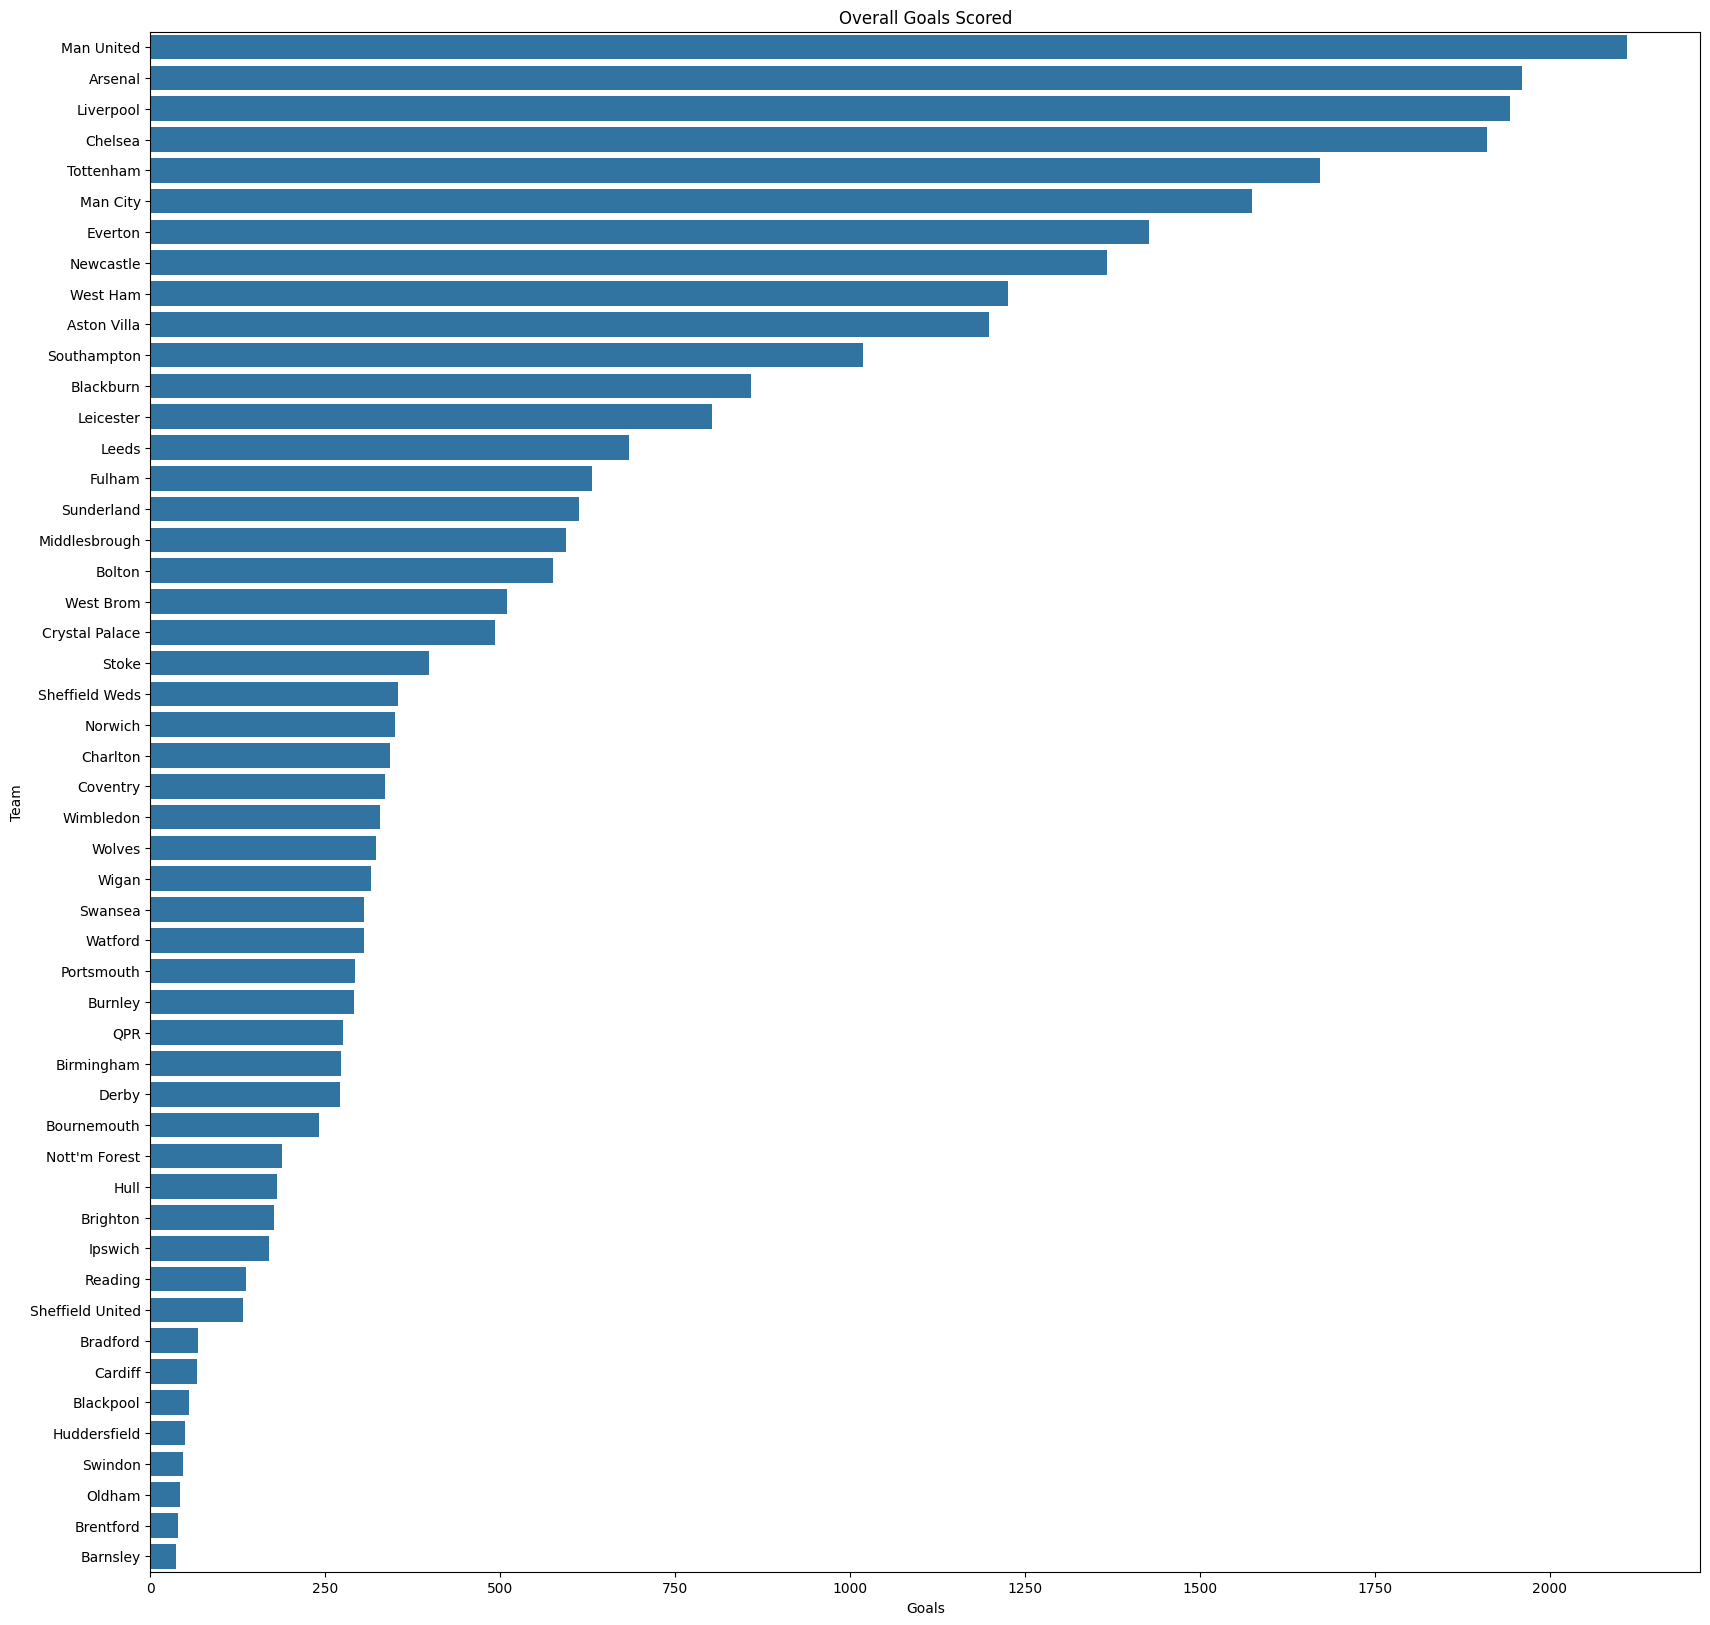

In [36]:
import matplotlib.pyplot as plt # Import the matplotlib library
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize'] = (20, 20)
# The 'x' and 'y' arguments should be column names within the 'data' DataFrame
sns.barplot(x="Goals", y='HomeTeam', data=EPL_team_goals)
plt.title('Overall Goals Scored')
plt.ylabel('Team')


As we can see,
Manchester United has scored the highest goals in Premier League since 2000-01 season till date.
The traditional "big-six" teams occupy the top six positions.
Bradford has scored the least goals in premier league.